In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from random import random

# K means clustering

In [26]:
X=np.array([[random(), random()] for i in range(100)]) 


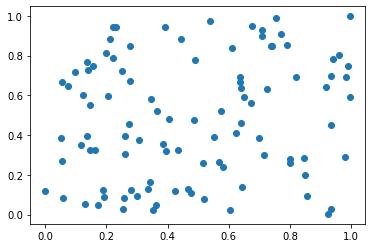

In [27]:
plt.scatter(X[:,0],X[:,1])

In [34]:
model=KMeans(n_clusters=4)
model.fit(X)

KMeans(n_clusters=4)

In [35]:
model.predict(X)

array([2, 0, 0, 3, 3, 2, 1, 1, 1, 1, 2, 0, 1, 3, 0, 3, 2, 3, 1, 2, 2, 2,
       0, 3, 3, 1, 0, 2, 3, 0, 1, 2, 1, 1, 0, 2, 2, 1, 1, 1, 0, 3, 3, 1,
       0, 3, 3, 3, 0, 1, 0, 2, 1, 3, 0, 1, 2, 1, 0, 0, 1, 2, 2, 1, 2, 2,
       3, 3, 0, 2, 2, 2, 2, 1, 1, 1, 2, 0, 3, 1, 2, 3, 1, 3, 1, 0, 1, 1,
       1, 2, 0, 3, 1, 0, 3, 1, 3, 0, 0, 2])

In [36]:
# Position des centroides
model.cluster_centers_

array([[0.71103205, 0.26560223],
       [0.25718809, 0.21407498],
       [0.78094556, 0.77929653],
       [0.229993  , 0.74351053]])

In [37]:
# Somme des distances 
print(model.inertia_)
print(model.score(X)) # c'est - inertia

3.7686942306317492
-3.7686942306317492


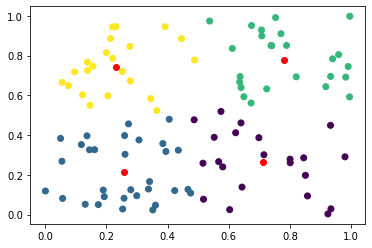

In [38]:
plt.scatter(model.cluster_centers_[:,0] , model.cluster_centers_[:,1],c='r')
plt.scatter(X[:,0],X[:,1],c=model.predict(X))

In [ ]:
# Elbow method pour choisir le bon nombre de clusteers

Text(0, 0.5, 'Cout du modèle (Inertia)')

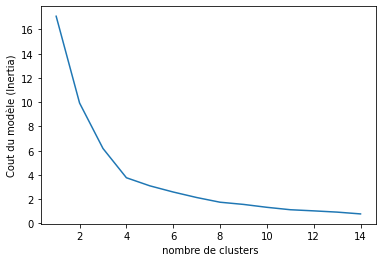

In [40]:
inertia=[]
Krange=range(1,15)
for k in Krange:
    model=KMeans(n_clusters=k).fit(X)
    inertia.append(model.inertia_)
plt.plot(Krange,inertia)
plt.xlabel(' nombre de clusters')
plt.ylabel('Cout du modèle (Inertia)')

In [ ]:
# le meilleur nombre de clusters est donc de 4

# Détection d'anomalie

## Isolation forest 

In [45]:
L=[[random(), random()] for i in range(100)]
L.append([2,2])
X=np.array(L)

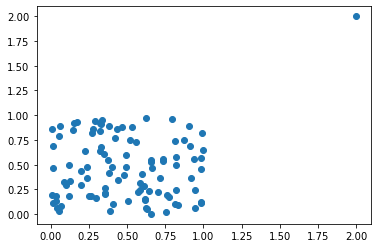

In [46]:
plt.scatter(X[:,0],X[:,1])

In [47]:
from sklearn.ensemble import IsolationForest

In [48]:
model=IsolationForest(contamination=0.01) # le pourcentage d'anomalie estimé

In [49]:
model.fit(X)

IsolationForest(contamination=0.01)

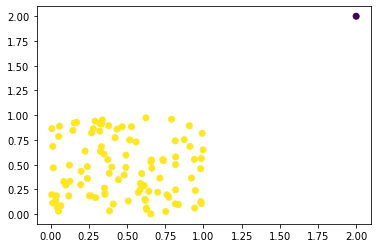

In [50]:
plt.scatter(X[:,0],X[:,1],c=model.predict(X))

In [ ]:
# on peut détecter toutes sortes d'anomalies

In [51]:
# Exemple pour retirer les mauvaises données dans un dataset
from sklearn.datasets import load_digits
digits=load_digits()
images=digits.images
X=digits.data
y=digits.target
print(X.shape)

(1797, 64)


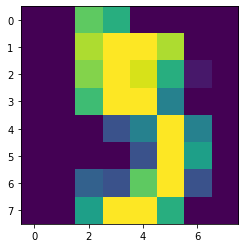

In [52]:
plt.imshow(images[5])

In [53]:
model =IsolationForest(random_state=0, contamination=0.02)

In [54]:
model.fit(X)

IsolationForest(contamination=0.02, random_state=0)

In [55]:
model.predict(X) # On a des 1 et des -1 
# 1 : pas d'anomalies
# -1 : anomalies

array([1, 1, 1, ..., 1, 1, 1])

In [56]:
outliers= model.predict(X) == -1

In [57]:
outliers

array([False, False, False, ..., False, False, False])

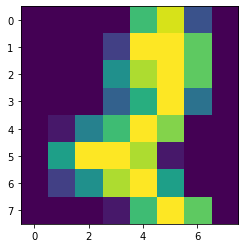

In [59]:
plt.imshow(images[outliers][0])

In [ ]:
# Local outlier detection est aussi utile

# PCA: réduction de dimension

In [71]:
from sklearn.decomposition import PCA

In [72]:
model=PCA(n_components=2)
X_red=model.fit_transform(X)

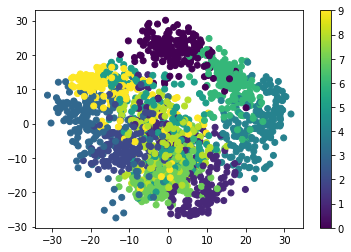

In [74]:
plt.scatter(X_red[:,0],X_red[:,1],c=y)
plt.colorbar()

In [76]:
model.components_.shape

(2, 64)

### Compression de dataset 

In [84]:
X.shape

(1797, 64)

In [95]:
model=PCA(n_components=64)
X_red=model.fit_transform(X)

In [96]:
np.cumsum(model.explained_variance_ratio_)

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496353,
       0.59413263, 0.6372925 , 0.67390623, 0.70743871, 0.73822677,
       0.76195018, 0.78467714, 0.80289578, 0.82063433, 0.83530534,
       0.84940249, 0.86258838, 0.87506976, 0.88524694, 0.89430312,
       0.9031985 , 0.91116973, 0.91884467, 0.9260737 , 0.93303259,
       0.9389934 , 0.94474955, 0.94990113, 0.95479652, 0.9590854 ,
       0.96282146, 0.96635421, 0.96972105, 0.97300135, 0.97608455,
       0.97902234, 0.98158823, 0.98386565, 0.98608843, 0.98820273,
       0.99010182, 0.99168835, 0.99319995, 0.99460574, 0.99577196,
       0.99684689, 0.99781094, 0.99858557, 0.99914278, 0.99954711,
       0.99975703, 0.99983951, 0.99989203, 0.99994255, 0.99997555,
       0.99998798, 0.99999503, 0.99999804, 0.99999911, 0.99999966,
       1.        , 1.        , 1.        , 1.        ])

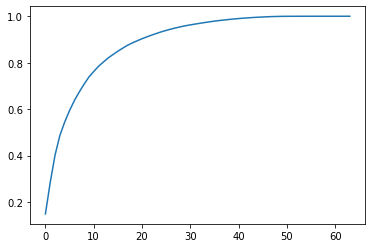

In [97]:
plt.plot(np.cumsum(model.explained_variance_ratio_))

In [98]:
np.argmax(np.cumsum(model.explained_variance_ratio_)> 0.99)

40

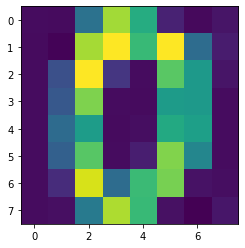

In [106]:
# ON peut directement faire le PCA avec le pourcentage de variance recherché
model=PCA(n_components=0.99)
X_red=model.fit_transform(X)
X_recover=model.inverse_transform(X_red)
plt.imshow(X_recover[0].reshape((8,8)))

In [ ]:
# Toujours standardiser avant les PCA